In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

In [3]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [4]:
train_X.shape

(60000, 28, 28, 1)

In [5]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

In [6]:
train_X = train_X / 255
test_X = test_X / 255

In [7]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

In [11]:
test_Y_one_hot.shape

(10000, 10)

In [8]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = (28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))


model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [9]:
model.fit(train_X, train_Y_one_hot, batch_size = 64, epochs = 10)

Epoch 1/10
938/938 [==============================] - 27s 29ms/step - loss: 0.4624 - accuracy: 0.8342
Epoch 2/10
938/938 [==============================] - 45s 48ms/step - loss: 0.3142 - accuracy: 0.8866
Epoch 3/10
938/938 [==============================] - 46s 49ms/step - loss: 0.2744 - accuracy: 0.9007
Epoch 4/10
938/938 [==============================] - 46s 49ms/step - loss: 0.2473 - accuracy: 0.9095
Epoch 5/10
938/938 [==============================] - 46s 49ms/step - loss: 0.2233 - accuracy: 0.91860s - loss: 0.2233 - accuracy
Epoch 6/10
938/938 [==============================] - 48s 51ms/step - loss: 0.2103 - accuracy: 0.92300s - loss: 0.2105 - 
Epoch 7/10
938/938 [==============================] - 47s 51ms/step - loss: 0.1951 - accuracy: 0.9286
Epoch 8/10
938/938 [==============================] - 42s 45ms/step - loss: 0.1806 - accuracy: 0.9338
Epoch 9/10
938/938 [==============================] - 43s 46ms/step - loss: 0.1693 - accuracy: 0.9384
Epoch 10/10
938/938 [=============

In [12]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.2878 - accuracy: 0.9035
Test loss: 0.28781384229660034
Test accuracy: 0.9035000205039978


In [13]:
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

9


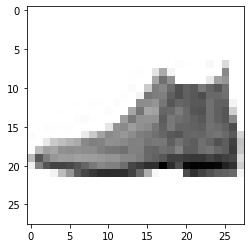

In [16]:
plt.imshow(test_X[0].reshape(28,28), cmap = plt.cm.binary)
plt.show()